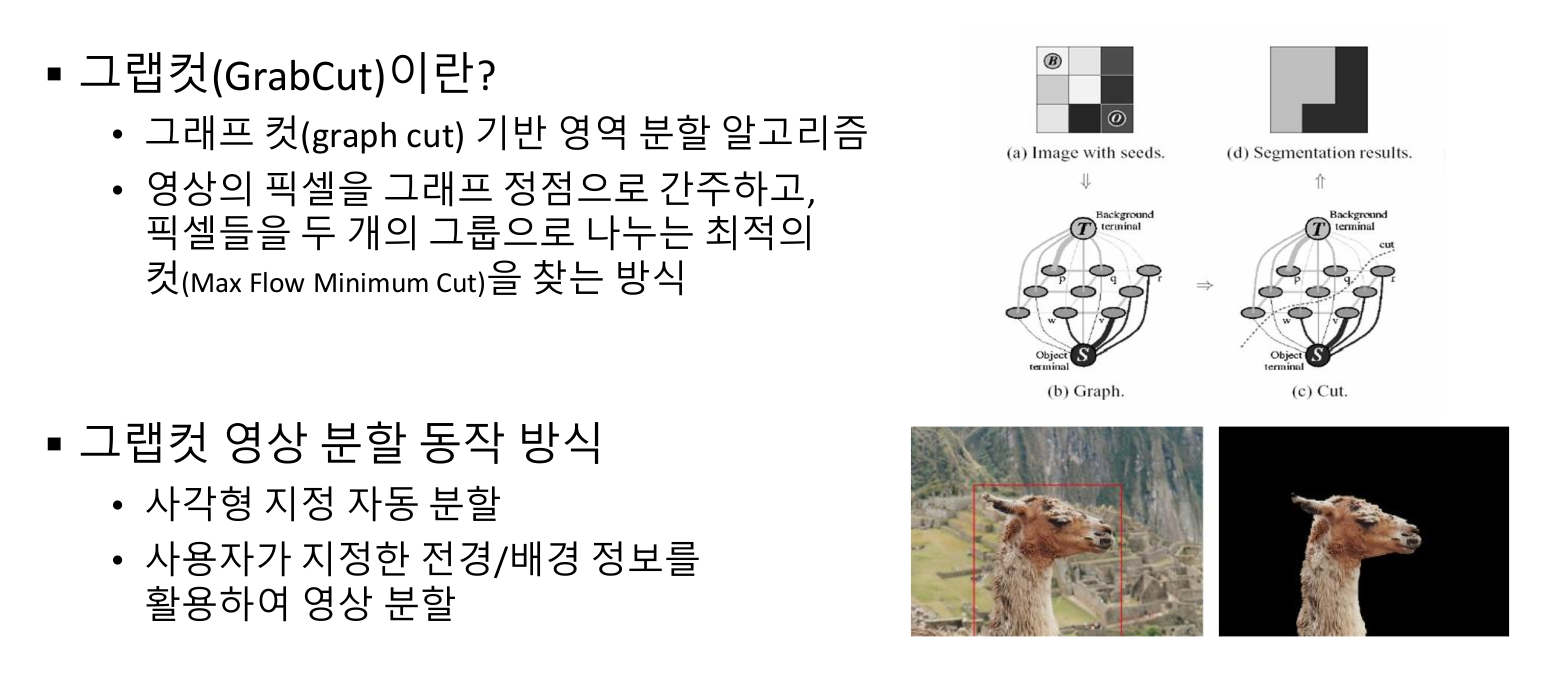

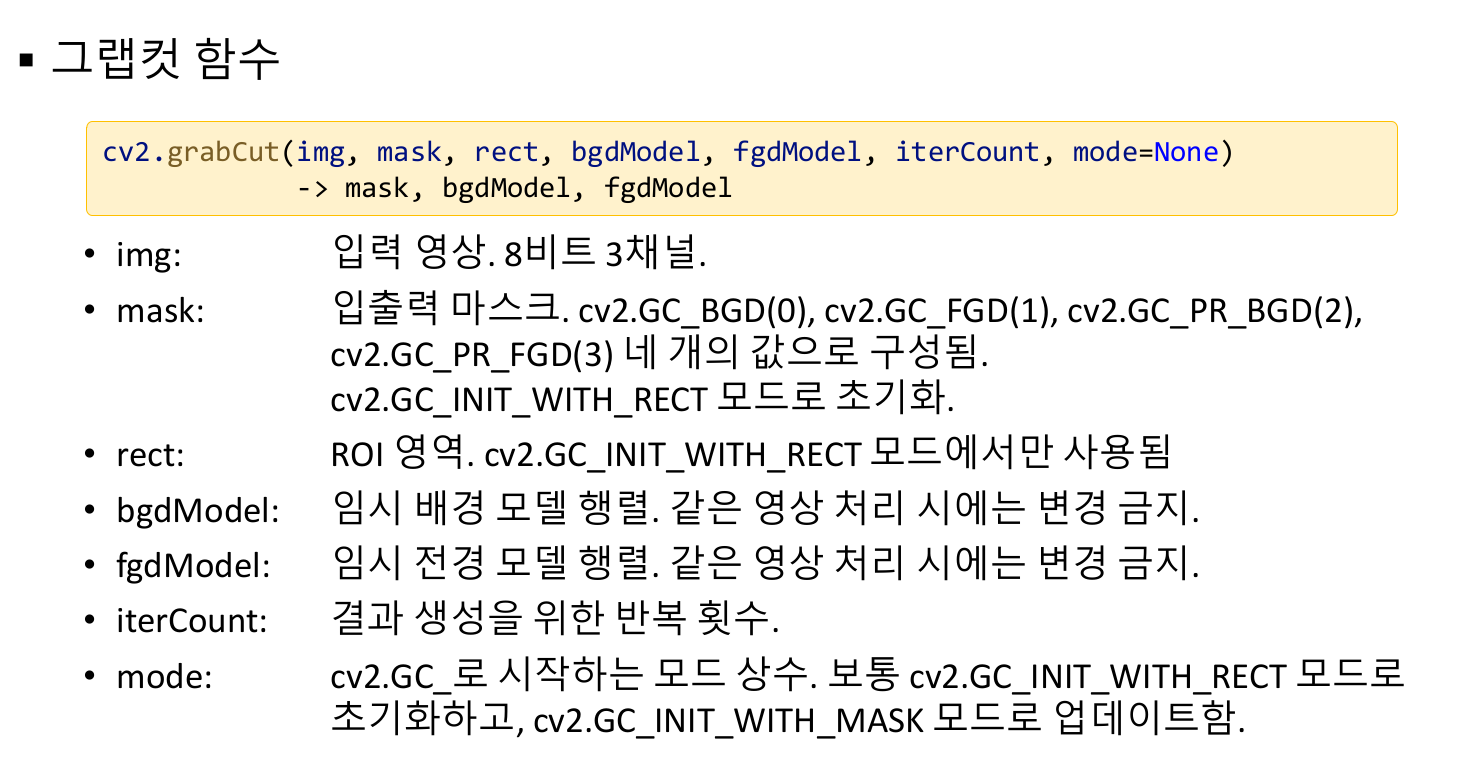

# 그랩컷 예제 1

In [6]:
import sys
import numpy as np
import cv2


In [7]:
src = cv2.imread("../data/nemo.jpg")

if src is None:
    print('Image load failed')
    sys.exit()

In [9]:
# 사각형 지정을 통한 초기 분할
rc = cv2.selectROI(src)
mask = np.zeros(src.shape[:2], np.uint8)

cv2.grabCut(src, mask, rc, None, None, 5, cv2.GC_INIT_WITH_RECT)

# 0: cv2.GC_BGD, 2: cv2.GC_PR_BGD -> 백그라운드
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask2[:, :, np.newaxis]

# 초기 분할 결과 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


# 그랩컷 예제 2

In [15]:
# 입력 영상 불러오기
src = cv2.imread('../data/nemo.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

In [24]:
mask = np.zeros(src.shape[:2], np.uint8)  # 마스크
bgdModel = np.zeros((1, 65), np.float64)  # 배경 모델
fgdModel = np.zeros((1, 65), np.float64)  # 전경 모델

In [27]:
rc = cv2.selectROI(src)



cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

# 0: cv2.GC_BGD, 2: cv2.GC_PR_BGD
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype('uint8')
dst = src * mask2[:, :, np.newaxis]

# 초기 분할 결과 출력
cv2.imshow('dst', dst)

# 마우스 이벤트 처리 함수 등록
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(dst, (x, y), 3, (255, 0, 0), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
        cv2.imshow('dst', dst)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(dst, (x, y), 3, (0, 0, 255), -1)
        cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
        cv2.imshow('dst', dst)
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(dst, (x, y), 3, (255, 0, 0), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_FGD, -1)
            cv2.imshow('dst', dst)
        elif flags & cv2.EVENT_FLAG_RBUTTON:
            cv2.circle(dst, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(mask, (x, y), 3, cv2.GC_BGD, -1)
            cv2.imshow('dst', dst)


cv2.setMouseCallback('dst', on_mouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER
        # 사용자가 지정한 전경/배경 정보를 활용하여 영상 분할
        cv2.grabCut(src, mask, rc, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK)
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        dst = src * mask2[:, :, np.newaxis]
        cv2.imshow('dst', dst)
    elif key == 27:
        break

cv2.destroyAllWindows()
